In [1]:
import pandas as pd
import os
inpath = "../data/chall_rank_more/"
fnlist = os.listdir(inpath)
dfs = []
for fn in fnlist:
    df = pd.read_csv(inpath+fn)
    dfs.append(df)
data = pd.concat(dfs)
data.drop_duplicates(inplace=True)

In [2]:
data['character_level_group'] = (data['character_level'] - 260 ) // 5

data2 = data[data['character_level_group'] >= 0].groupby(by=['date','character_level_group']).size()

data2 = data2.reset_index(name='size')
data2['date'] = pd.to_datetime(data2['date'])

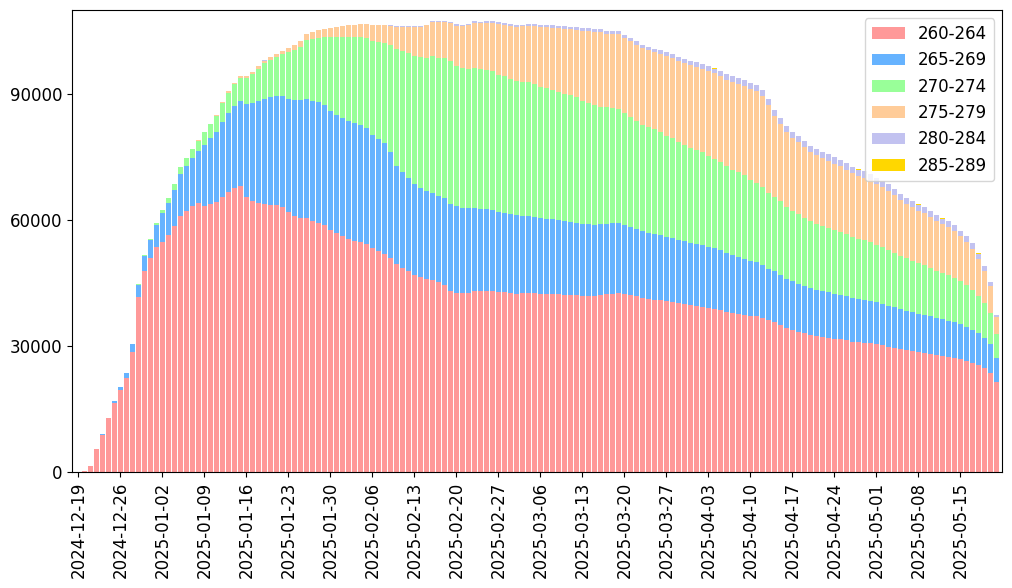

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
sdate = '2024-12-20'
edate = '2025-05-22'
base_date = pd.to_datetime(sdate)

xx = pd.date_range(sdate, edate, freq='D')
yy = np.zeros((len(xx), 6))
for idx, row in data2.iterrows():
    yy[(row['date'] - base_date).days , row['character_level_group']] = row['size']

colors = [
    '#ff9999',  # 연분홍
    '#66b3ff',  # 하늘색
    '#99ff99',  # 연녹색
    '#ffcc99',  # 살구색
    '#c2c2f0',  # 연보라
    '#ffd700',  # 골드
]

label_str = ['260-264', '265-269', '270-274',  '275-279', '280-284', '285-289']
bottom = np.zeros(yy.shape[0])
fig, ax = plt.subplots(figsize=(12, 6))
for i in range(6):
    ax.bar(xx, yy[:, i], bottom=bottom, color=colors[i], label=label_str[i]);
    bottom += yy[:, i]
ax.set_xticks(xx[0::7]);
ax.set_xticklabels((xx[::7]-pd.Timedelta('1D')).strftime('%Y-%m-%d'), rotation=90, fontsize=12);
ax.set_xlim(pd.to_datetime(sdate) - pd.Timedelta('1D'), pd.to_datetime(edate) + pd.Timedelta('1D'))

ax.set_yticks(range(0, 120000, 30000))
ax.set_yticklabels(range(0, 120000, 30000), fontsize=12)
ax.set_ylim(0, 110000)
ax.legend(fontsize=12)

In [4]:
data2.groupby('character_level_group')['size'].max()

character_level_group
0    68154
1    28679
2    33939
3    21811
4     1555
5       26
Name: size, dtype: int64

In [5]:
print(pd.to_datetime('2025-04-13') - pd.to_datetime('2025-02-19'))

53 days 00:00:00


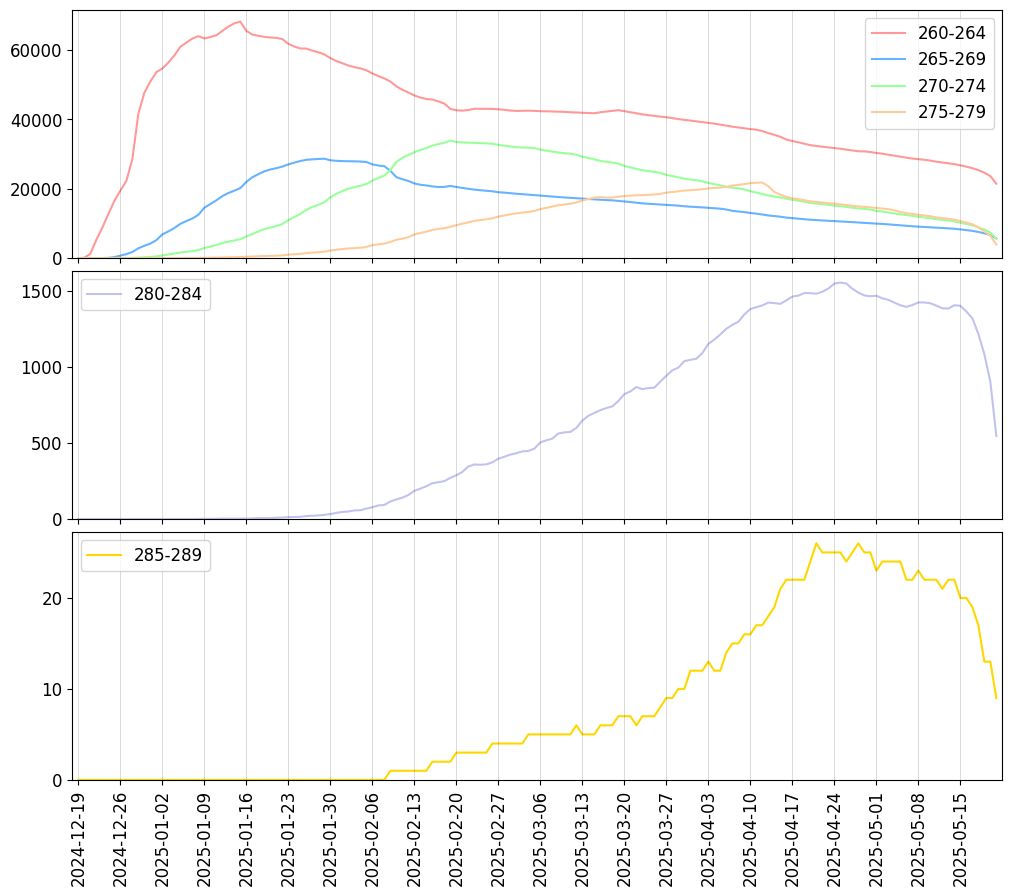

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
sdate = '2024-12-20'
edate = '2025-05-22'
base_date = pd.to_datetime(sdate)

xx = pd.date_range(sdate, edate, freq='D')
yy = np.zeros((len(xx), 6))
for idx, row in data2.iterrows():
    yy[(row['date'] - base_date).days , row['character_level_group']] = row['size']

colors = [
    '#ff9999',  # 연분홍
    '#66b3ff',  # 하늘색
    '#99ff99',  # 연녹색
    '#ffcc99',  # 살구색
    '#c2c2f0',  # 연보라
    '#ffd700',  # 골드
]
label_str = ['260-264', '265-269', '270-274',  '275-279', '280-284', '285-289']
yticks = [
    range(0, 60000+1, 20000),
    range(0, 1500+1, 500),
    range(0, 20+1, 10)
]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05)  # 세로 간격 줄이기

for i in range(6):
    if i < 4:
        axes[0].plot(xx, yy[:, i], color=colors[i], label=label_str[i])
    else:
        axes[i-3].plot(xx, yy[:, i], color=colors[i], label=label_str[i])

xticklabels = [
    [],
    [],
    (xx[::7]-pd.Timedelta('1D')).strftime('%Y-%m-%d')
]

for i in range(3):
    axes[i].set_xticks(xx[0::7]);
    axes[i].set_xlim(pd.to_datetime(sdate) - pd.Timedelta('1D'), pd.to_datetime(edate) + pd.Timedelta('1D'))
    axes[i].set_xticklabels(xticklabels[i], rotation=90, fontsize=12);
    axes[i].set_yticks(yticks[i])
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].legend(fontsize=12)
    axes[i].set_ylim(bottom=0)  # y축 최소값만 10으로 고정

    for x in xx[0::7]:
        axes[i].axvline(x = x, lw=0.5, color='black', alpha=0.2)